In [51]:
import os
import pickle as pkl
import pandas as pd

In [52]:
def parse_dir(dir_name, num_feats, num_samples, network_type):
    dir_results = []
    for fname in os.listdir(dir_name):
        if 'cv_results' not in fname: continue
        seed = int(os.path.splitext(fname)[0].split('_')[-1])
        with open(os.path.join(dir_name, fname), 'rb') as f:
            rslt = pkl.load(f)
        num_folds = len(rslt['torch_train_acc'])
        for f in range(num_folds):
            # TODO: could add train metrics here
            tune_acc = rslt['torch_tune_acc'][f]
            tune_auroc = rslt['torch_tune_auroc'][f]
            tune_aupr = rslt['torch_tune_aupr'][f]
            dir_results.append([num_feats, num_samples, network_type,
                                seed, f+1, tune_acc, tune_auroc, tune_aupr])
    return dir_results
        
# read results from output directory
results_dir = '../testing'
output = []
for dir_name in os.listdir(results_dir):
    if 'p10' not in dir_name: continue
    sp = dir_name.split('_')
    num_feats = int(sp[0].replace('p', ''))
    try:
        print(dir_name)
        num_samples = int(sp[1].replace('n', ''))
    except (IndexError, ValueError):
        num_samples = 9906
    try:
        if sp[2] == 'random':
            network_type = 'random'
        elif sp[2] == 'nn':
            network_type = 'no_network' 
    except IndexError:
        network_type = 'weighted'
    output += parse_dir(os.path.join(results_dir, dir_name), 
                        num_feats, num_samples, network_type)
    
df = pd.DataFrame(output, 
                  columns=['num_feats', 'num_samples', 'network_type',
                           'seed', 'fold', 'tune_acc', 'tune_auroc', 'tune_aupr'])
df.head(n=10)

p10
p10_n100_random
p10_n100_nn
p10_n200
p10_n5000_random
p10_n1000
p10_n5000_nn
p10_n2000_nn
p10_n2000
p10_n100
p10_n500_nn
p10_n1000_random
p10_n5000
p10_n200_nn
p10_n500_random
p10_n500
p10_n1000_nn
p10_n2000_random
p10_random
p10_n200_random


,num_feats,num_samples,network_type,seed,fold,tune_acc,tune_auroc,tune_aupr
0,10,9906,weighted,42,1,0.840079,0.907451,0.883266
1,10,9906,weighted,42,2,0.838519,0.901322,0.874229
2,10,9906,weighted,42,3,0.827654,0.889585,0.850978
3,10,100,random,42,1,0.631579,0.615385,0.422208
4,10,100,random,42,2,0.578947,0.666667,0.607540
5,10,100,random,42,3,0.631579,0.693182,0.615572
6,10,100,no_network,42,1,0.263158,0.250000,0.321966
7,10,100,no_network,42,2,0.684211,0.704545,0.601335
8,10,100,no_network,42,3,0.526316,0.542857,0.502049
9,10,200,weighted,42,1,0.700000,0.741855,0.723722


Text(0, 0.5, 'Tune set accuracy')

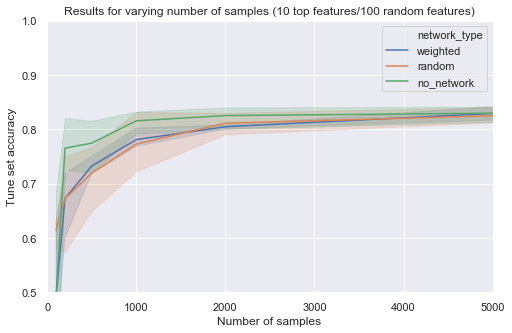

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (8, 5)})
sns.lineplot(data=df, x='num_samples', y='tune_acc', hue='network_type')
plt.xlim(-10, 5000)
plt.ylim(0.5, 1.0)
plt.title('Results for varying number of samples (10 top features/100 random features)')
plt.xlabel('Number of samples')
plt.ylabel('Tune set accuracy')

Text(0, 0.5, 'Tune set AUROC')

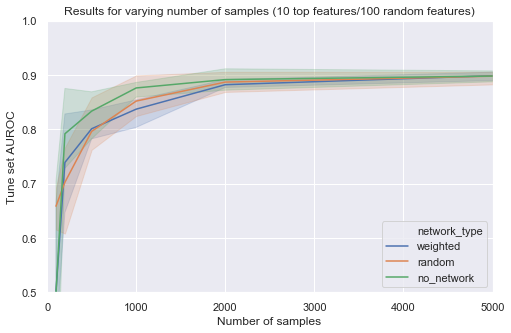

In [54]:
sns.set(rc={'figure.figsize': (8, 5)})
sns.lineplot(data=df, x='num_samples', y='tune_auroc', hue='network_type')
plt.xlim(-10, 5000)
plt.ylim(0.5, 1.0)
plt.title('Results for varying number of samples (10 top features/100 random features)')
plt.xlabel('Number of samples')
plt.ylabel('Tune set AUROC')

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def parse_results(fname, method, num_feats):
    import pickle as pkl
    return_results = []
    with open(fname, 'rb') as f:
        results = pkl.load(f)
        for k, v in results.items():
            sk = k.split('_')
            model = sk[0]
            dataset = sk[1]
            metric = sk[2]
            for fold, r in enumerate(v, 1):
                return_results.append([model, method, num_feats, dataset,
                                       fold, metric, r])
    return return_results

# read results from output directory
results_dir = '../feature_add_no_l1'
output = []
for fname in os.listdir(results_dir):
    if 'results' not in fname: continue
    sp = os.path.splitext(fname)[0].split('_')
    print(sp)
    method = sp[2]
    num_feats = int(sp[-1].replace('n', ''))
    output += parse_results(os.path.join(results_dir, fname),
                            method, num_feats)
    
df = pd.DataFrame(output, 
                  columns=['model', 'method', 'num_feats', 'dataset', 'fold', 'metric', 'value'])
df.head(n=10)

['cv', 'results', 'random', '42', 'n200']
['cv', 'results', 'random', '42', 'n500']
['cv', 'results', 'random', '42', 'n50']
['cv', 'results', 'top', '42', 'n500']
['cv', 'results', 'random', '42', 'n10']
['cv', 'results', 'top', '42', 'n10']
['cv', 'results', 'top', '42', 'n200']
['cv', 'results', 'top', '42', 'n50']
['cv', 'results', 'top', '42', 'n1000']
['cv', 'results', 'random', '42', 'n1000']
['cv', 'results', 'random', '42', 'n100']
['cv', 'results', 'top', '42', 'n100']


,model,method,num_feats,dataset,fold,metric,value
0,sklearn,random,200,train,1,auroc,0.869506
1,sklearn,random,200,train,2,auroc,0.866494
2,sklearn,random,200,train,3,auroc,0.875381
3,sklearn,random,200,train,1,aupr,0.846598
4,sklearn,random,200,train,2,aupr,0.836700
5,sklearn,random,200,train,3,aupr,0.846059
6,sklearn,random,200,train,1,acc,0.799753
7,sklearn,random,200,train,2,acc,0.793137
8,sklearn,random,200,train,3,acc,0.800790
9,sklearn,random,200,tune,1,auroc,0.850722


Text(0, 0.5, 'Accuracy')

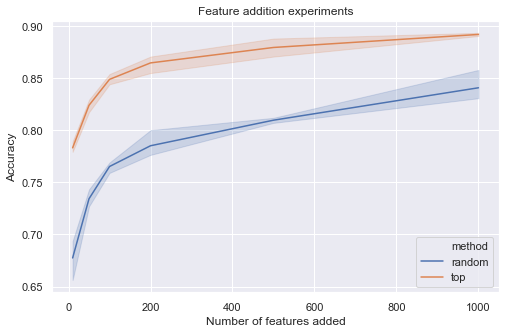

In [10]:
sns.set(rc={'figure.figsize': (8, 5)})
acc_df = df[(df['model'] == 'sklearn') & (df['dataset'] == 'tune') & (df['metric'] == 'acc')]
sns.lineplot(data=acc_df, x='num_feats', y='value', hue='method')
plt.title('Feature addition experiments')
plt.xlabel('Number of features added')
plt.ylabel('Accuracy')

Text(0, 0.5, 'AUROC')

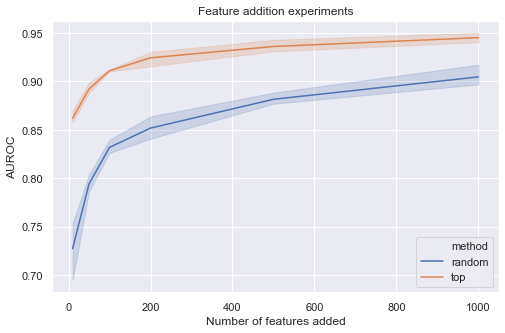

In [9]:
sns.set(rc={'figure.figsize': (8, 5)})
roc_df = df[(df['model'] == 'sklearn') & (df['dataset'] == 'tune') & (df['metric'] == 'auroc')]
sns.lineplot(data=roc_df, x='num_feats', y='value', hue='method')
plt.title('Feature addition experiments')
plt.xlabel('Number of features added')
plt.ylabel('AUROC')